# Machine Learning - Aprendizaje Supervisado

Regresión lineal

(0.0, 3.0, 0.0, 15.0)

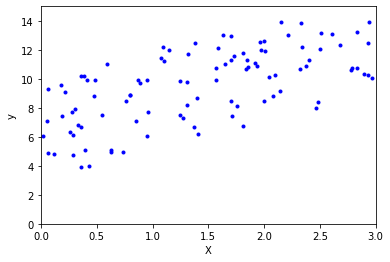

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(0)
# Creo un array con 100 datos aleatorios distribuidos Uniforme(0,1), y los multiplico por 3 para obtener datos entre 0 y 3
X = 3*np.random.rand(100,1)
# Creo un ndarray con 100 datos con la forma y = 5 +2x + u(-2,5), donde u(-2,5) es la distribución uniforme entre -2 y 5
y = 5 + 2*X + np.random.uniform(-2,5,100).reshape(-1,1)
#Grafico las variables independiente (X) y dependiente (y)
plt.plot(X,y, "b.")
plt.ylabel('y')
plt.xlabel('X')
plt.axis([0, 3, 0, 15])

In [2]:
# Como sabemos que la solución exacta para la regresión lineal es de la forma inv(X_.T.dot(X_)).dot(X_.T).dot(y), entonces: 
# concatenamos 1 a variables independientes y hacemos los productos punto para obtener los parametros de la regresión lineal
X_ = np.c_[np.ones((100,1)), X]
prametros_solucion = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
prametros_solucion

array([[6.90656017],
       [1.85195247]])

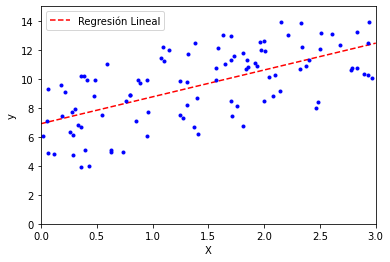

In [3]:
# Usando los parametros obtenemos la recta de regresión lineal y la grafico:
X_nuevo = np.array([[0], [3]])
X_nuevo_ = np.c_[np.ones((2,1)), X_nuevo]
y_pred = X_nuevo_.dot(prametros_solucion)
plt.plot(X_nuevo, y_pred, 'r--')
plt.plot(X,y, "b.")
plt.ylabel('y')
plt.xlabel('X')
plt.axis([0, 3, 0, 15])
plt.legend(["Regresión Lineal"])
plt.show()

In [4]:
# Ahora para obtener el error cuadratico medio importamos librería mean_squared_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
np.random.seed(0)
X_ = np.c_[np.ones((100,1)), X]
y_pred = X_.dot(prametros_solucion)
mse= str(mean_squared_error(y,y_pred))
r2 = str(r2_score(y,y_pred))
"error cuadratico medio: " + mse + "  y coeficiente de determinacion r_2: " + r2

'error cuadratico medio: 3.7354290456087527  y coeficiente de determinacion r_2: 0.40717567691580314'

Como comentario se añade que no es un buen R cuadrado, por cuanto no es cercano a 1.

Regresión Polinomial

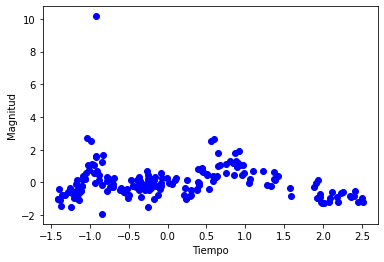

In [5]:
# Leo archivo ts.csv que contiene data de curva de luz, trabajo con una muestra de 200 datos y los grafico
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('ts.csv')
data_muestra = data.sample(200) 
plt.scatter(data_muestra['tiempo'],data_muestra['magnitud'], color='blue')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

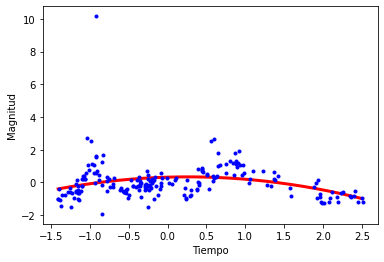

In [6]:
# Importo las librerias de scikit learn para generar una transformación polinomial de la variable independiente.
# Pruebo con un polinomio de grado 2, y calculo su error cuadratico medio y su coeficiente de determinación R2.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
polinomio = PolynomialFeatures(degree = 2) 
model = LinearRegression() 
#Entreno el modelo
x = data_muestra['tiempo'].values.reshape(-1,1) # el reshape genera un vector, pues el values solo genera una tupla
data_poly = polinomio.fit_transform(x) 
model.fit(data_poly, data_muestra['magnitud']) 
x_lin = np.linspace(min(data_muestra['tiempo']),max(data_muestra['tiempo']),num=200).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)
plt.plot(x_lin,y_pred, color='red',linewidth=3)
plt.plot(data_muestra['tiempo'], data_muestra['magnitud'],'.', color='blue')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

In [7]:
# Calculamos el Error Cuadrático Medio y R_cuad para el polonomio de grado 2
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
mse = str(mean_squared_error(data_muestra['magnitud'].values.reshape(-1,1),y_pred.reshape(-1,1)))
r2 = str(r2_score(data_muestra['magnitud'].values.reshape(-1,1),y_pred.reshape(-1,1)))
"error cuadratico medio: " + mse + "  y coeficiente de determinacion r_2: " + r2

'error cuadratico medio: 1.299545119984317  y coeficiente de determinacion r_2: -0.11157394981586366'

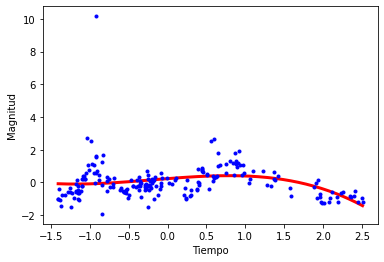

In [8]:
# Ahora probamos con polinomio de grado 3
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
polinomio = PolynomialFeatures(degree = 3) 
model = LinearRegression() 
#Entreno el modelo
x = data_muestra['tiempo'].values.reshape(-1,1) # el reshape genera un vector, pues el values solo genera una tupla
data_poly = polinomio.fit_transform(x) 
model.fit(data_poly, data_muestra['magnitud']) 
x_lin = np.linspace(min(data_muestra['tiempo']),max(data_muestra['tiempo']),num=200).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)
plt.plot(x_lin,y_pred, color='red',linewidth=3)
plt.plot(data_muestra['tiempo'], data_muestra['magnitud'],'.', color='blue')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

In [9]:
# Calculamos el Error Cuadrático Medio y R_cuad para el polonomio de grado 3
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
mse = str(mean_squared_error(data_muestra['magnitud'].values.reshape(-1,1),y_pred.reshape(-1,1)))
r2 = str(r2_score(data_muestra['magnitud'].values.reshape(-1,1),y_pred.reshape(-1,1)))
"error cuadratico medio: " + mse + "  y coeficiente de determinacion r_2: " + r2

'error cuadratico medio: 1.3414918594829663  y coeficiente de determinacion r_2: -0.14745335268490223'

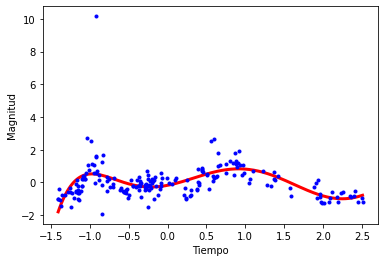

In [10]:
# Ahora probamos con polinomio de grado 6
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
polinomio = PolynomialFeatures(degree = 6) 
model = LinearRegression() 
#Entreno el modelo
x = data_muestra['tiempo'].values.reshape(-1,1) # el reshape genera un vector, pues el values solo genera una tupla
data_poly = polinomio.fit_transform(x) 
model.fit(data_poly, data_muestra['magnitud']) 
x_lin = np.linspace(min(data_muestra['tiempo']),max(data_muestra['tiempo']),num=200).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)
plt.plot(x_lin,y_pred, color='red',linewidth=3)
plt.plot(data_muestra['tiempo'], data_muestra['magnitud'],'.', color='blue')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

In [11]:
# Calculamos el Error Cuadrático Medio y R_cuad para el polonomio de grado 6
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
mse = str(mean_squared_error(data_muestra['magnitud'].values.reshape(-1,1),y_pred.reshape(-1,1)))
r2 = str(r2_score(data_muestra['magnitud'].values.reshape(-1,1),y_pred.reshape(-1,1)))
"error cuadratico medio: " + mse + "  y coeficiente de determinacion r_2: " + r2

'error cuadratico medio: 1.5177977380607393  y coeficiente de determinacion r_2: -0.2982576755304347'

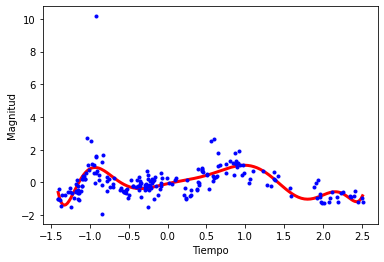

In [12]:
# Ahora probamos con polinomio de grado 10
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
polinomio = PolynomialFeatures(degree = 10) 
model = LinearRegression() 
#Entreno el modelo
x = data_muestra['tiempo'].values.reshape(-1,1) # el reshape genera un vector, pues el values solo genera una tupla
data_poly = polinomio.fit_transform(x) 
model.fit(data_poly, data_muestra['magnitud']) 
x_lin = np.linspace(min(data_muestra['tiempo']),max(data_muestra['tiempo']),num=200).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)
plt.plot(x_lin,y_pred, color='red',linewidth=3)
plt.plot(data_muestra['tiempo'], data_muestra['magnitud'],'.', color='blue')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

In [13]:
# Calculamos el Error Cuadrático Medio (MSE) y R_cuad para el polonomio de grado 10
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
mse = str(mean_squared_error(data_muestra['magnitud'].values.reshape(-1,1),y_pred.reshape(-1,1)))
r2 = str(r2_score(data_muestra['magnitud'].values.reshape(-1,1),y_pred.reshape(-1,1)))
"error cuadratico medio: " + mse + "  y coeficiente de determinacion r_2: " + r2

'error cuadratico medio: 1.6881838270158394  y coeficiente de determinacion r_2: -0.4439984697367825'

In [ ]:
# En conclusión, a medida que aumentaba el grado del polinomio, las medidas de bondad como el MSE fueron en aumento,
# y el coeficiente de determinacion R_cuadrado cada vez se alejaba más de 1, lo que no es positivo.
# Además, a medida que se aumenta el grado del polinomio, aumenta mucho su complejidad, es decir, cada vez aumenta el riesgo
# de sobreajuste o overfitting, esto es, la poca capacidad de generalizar del modelo (con nuevos datos proporcionados)

Regresión con Penalización

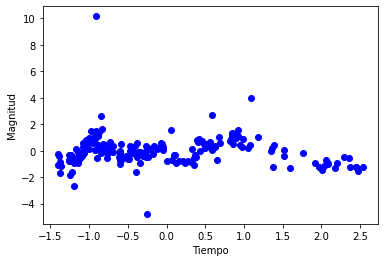

In [14]:
# Leo archivo ts.csv que contiene data de curva de luz, trabajo con una muestra de 200 datos y los grafico
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
data = pd.read_csv('ts.csv')
data_muestra = data.sample(200) 
x = data_muestra['tiempo'].values.reshape(-1,1)
y = data_muestra['magnitud'].values.reshape(-1,1)
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y']) #stack apila matrices
for i in range(2,16): 
    colname = 'x_%d'%i  
    data[colname] = data['x']**i
plt.scatter(data_muestra['tiempo'],data_muestra['magnitud'], color='blue')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

In [15]:
# Parto implementando la regresion RIDGE, creando la funcion llamada "ridge_regression", que pedirá como parametros:
# el data frame utlizado, los predictores a usar, el hiperparametro alpha (grado de penalizacion) y los graficos
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    # Entreno el modelo
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    # Grafico para el alpha ingresado
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred, color='red')
        plt.plot(data['x'],data['y'],'.', color='blue')
        plt.title('Alpha: %.3g'%alpha)
    # Devuelve el resultado en un formato predefinido
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

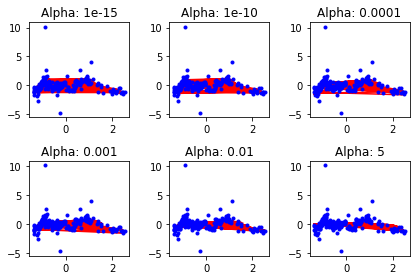

In [16]:
# Grafico pruebas con polinomios de diferentes grados
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [17]:
# Sigo con la implementacion de la regresion LASSO, creando la funcion llamada "lasso_regression", que pedirá como parametros:
# el data frame utlizado, los predictores a usar, el hiperparametro alpha (grado de penalizacion) y los graficos
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    # Entreno el modelo
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    # Grafico para el alpha ingresado
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred, color='red')
        plt.plot(data['x'],data['y'],'.', color='blue')
        plt.title('Alpha: %.3g'%alpha)
    # Devuelve el resultado en un formato predefinido
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.16619137847357, tolerance: 0.026836928472270895
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.16603739640271, tolerance: 0.026836928472270895
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.15079518228323, tolerance: 0.026836928472270895
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\li

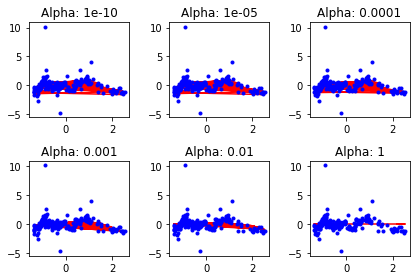

In [18]:
# Grafico pruebas con polinomios de diferentes grados
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [ ]:
# En conclusión, a medida que aumentaba el grado del polinomio, aumenta mucho su complejidad, es decir, cada vez aumenta
# el riesgo de sobreajuste o overfitting, esto es, la poca capacidad de generalizar del modelo (con nuevos datos proporcionados)
# además, hay que probar con más valores de alpha, pues es un parámetro que controla el grado de penalización: cuanto mayor 
# éste, los coeficientes de la regresión serán menores, resultando más robustos a la colinealidad. 
# Cuando alpha es cero, Ridge/Lasso es equivalente a la regresión lineal. En resumen, tenemos que probar con más valores.

Clasificación de estrellas variables

In [19]:
# Leo archivo ts2.csv que contiene data de estrellas variables y veo las 5 1eras filas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('ts2.csv')
data.head()

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,lpv,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,lpv,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,ecl,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,lpv,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,lpv,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


In [20]:
# Obtengo las estadisticas descriptivas de la data para conocerla un poco mejor y ver sus ordenes de magnitud
data.describe()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106905,0.130491,4.545400,0.317532,0.016345,0.000001,2.175457,14.988370,0.003703,0.039180,0.414658,0.010616,302.831851
std,0.147896,0.202838,6.121163,0.060427,0.126287,0.000684,9.423721,1.889971,0.005527,0.062624,0.122715,0.014490,944.665723
min,0.007000,0.000000,1.000000,0.070470,-1.763000,-0.016436,0.006402,11.666225,0.000259,0.002000,0.069444,0.000893,0.005627
25%,0.021000,0.000016,1.000000,0.290000,-0.004000,-0.000015,0.096856,13.608853,0.000743,0.007000,0.336667,0.002375,0.987460
50%,0.043500,0.020842,2.000000,0.318182,0.002500,-0.000002,0.342336,14.514339,0.001596,0.014000,0.411089,0.004850,18.144685
75%,0.143500,0.185764,5.000000,0.348214,0.017000,0.000009,1.038683,15.592764,0.005258,0.051500,0.480000,0.014186,189.760635
max,1.700500,0.980413,70.000000,0.536667,1.479000,0.033689,335.151515,21.099524,0.075959,1.025000,0.922034,0.171519,12870.875640


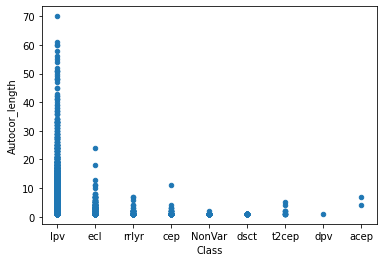

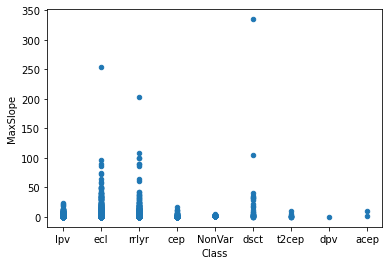

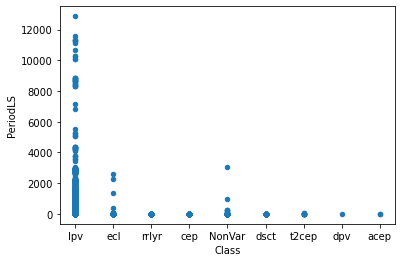

In [21]:
# En una 1era instancia se puede apreciar que es probable que los descriptores "Autocor_length", "MaxSlope" y "PeriodLS"
# pueden tener outliers, pues su valor máximo es muy grande en comparación a la media y los cuartiles, para las cuales
# graficaremos un scatter con las distintas clases, para esos 3 descriptores para visualizar los supuestos outliers
data.plot.scatter(x='Class', y='Autocor_length')
data.plot.scatter(x='Class', y='MaxSlope')
data.plot.scatter(x='Class', y='PeriodLS')
plt.show()

In [22]:
# Ahora hago un bucle para ver cuantos datos vacios o "NaN" hay en el dataset (y notaremos que no hay vacios)
for i in data.columns: 
    print(i+': '+ str(data[i].isnull().sum()))

Class: 0
Amplitude: 0
AndersonDarling: 0
Autocor_length: 0
Beyond1Std: 0
Gskew: 0
LinearTrend: 0
MaxSlope: 0
Mean: 0
Meanvariance: 0
MedianAbsDev: 0
MedianBRP: 0
PercentAmplitude: 0
PeriodLS: 0


In [23]:
# Ahora separaré las variables en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X, y = data.iloc[:,1:].values, data.iloc[:,0].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
# Estandarizaré las variables predictoras con Distribución Normal para que estén en la misma escala y sean comparables
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [25]:
# El 1er modelo que probaremos es un Arbol de Decision, con profundidad de 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = DecisionTreeClassifier(max_depth = 2, criterion='entropy') 
clf.fit(X_train_std, y_train)                                        
y_pred = clf.predict(X_test_std)
# Imprimo un reporte con las métricas de accuracy, precision, recall y f-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NonVar       0.00      0.00      0.00        17
        acep       0.00      0.00      0.00         2
         cep       0.00      0.00      0.00        30
        dsct       0.00      0.00      0.00         8
         ecl       0.80      0.79      0.79       109
         lpv       0.96      0.99      0.97       952
       rrlyr       0.69      0.86      0.77       130
       t2cep       0.00      0.00      0.00         2

    accuracy                           0.91      1250
   macro avg       0.31      0.33      0.32      1250
weighted avg       0.87      0.91      0.89      1250



D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Visualizo la matriz de confusion
confusion_matrix(y_test, y_pred)

array([[  0,   0,   0,   0,   4,   7,   6,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0,   0,   0,   1,   8,  21,   0],
       [  0,   0,   0,   0,   6,   0,   2,   0],
       [  0,   0,   0,   0,  86,  13,  10,   0],
       [  0,   0,   0,   0,   3, 941,   8,   0],
       [  0,   0,   0,   0,   8,  10, 112,   0],
       [  0,   0,   0,   0,   0,   1,   1,   0]], dtype=int64)

In [27]:
# Ahora probamos el Arbol de Decision, pero con profundidad de 5
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = DecisionTreeClassifier(max_depth = 5, criterion='entropy') 
clf.fit(X_train_std, y_train)                                        
y_pred = clf.predict(X_test_std)
# Imprimo un reporte con las métricas de accuracy, precision, recall y f-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NonVar       0.43      0.53      0.47        17
        acep       0.00      0.00      0.00         2
         cep       0.73      0.80      0.76        30
        dsct       0.71      0.62      0.67         8
         ecl       0.90      0.90      0.90       109
         lpv       0.99      0.99      0.99       952
       rrlyr       0.95      0.91      0.93       130
       t2cep       0.50      0.50      0.50         2

    accuracy                           0.96      1250
   macro avg       0.65      0.66      0.65      1250
weighted avg       0.96      0.96      0.96      1250



D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# Visualizo la matriz de confusion
confusion_matrix(y_test, y_pred)

array([[  9,   0,   3,   0,   0,   5,   0,   0],
       [  0,   0,   1,   0,   0,   1,   0,   0],
       [  0,   0,  24,   0,   1,   1,   4,   0],
       [  1,   0,   0,   5,   2,   0,   0,   0],
       [  1,   0,   0,   1,  98,   6,   2,   1],
       [ 10,   0,   1,   0,   1, 940,   0,   0],
       [  0,   0,   3,   1,   7,   1, 118,   0],
       [  0,   0,   1,   0,   0,   0,   0,   1]], dtype=int64)

In [29]:
# Ahora probamos el Arbol de Decision, pero con profundidad de 10
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = DecisionTreeClassifier(max_depth = 10, criterion='entropy') 
clf.fit(X_train_std, y_train)                                        
y_pred = clf.predict(X_test_std)
# Imprimo un reporte con las métricas de accuracy, precision, recall y f-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NonVar       0.58      0.41      0.48        17
        acep       0.00      0.00      0.00         2
         cep       0.79      0.87      0.83        30
        dsct       0.75      0.75      0.75         8
         ecl       0.89      0.88      0.88       109
         lpv       0.99      0.99      0.99       952
       rrlyr       0.93      0.94      0.93       130
       t2cep       0.50      0.50      0.50         2

    accuracy                           0.96      1250
   macro avg       0.68      0.67      0.67      1250
weighted avg       0.96      0.96      0.96      1250



D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Visualizo la matriz de confusion
confusion_matrix(y_test, y_pred)

array([[  7,   0,   1,   0,   2,   6,   1,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,  26,   0,   1,   0,   3,   0],
       [  0,   0,   0,   6,   1,   0,   1,   0],
       [  0,   0,   0,   2,  96,   6,   4,   1],
       [  5,   0,   1,   0,   4, 942,   0,   0],
       [  0,   0,   3,   0,   4,   1, 122,   0],
       [  0,   0,   0,   0,   0,   1,   0,   1]], dtype=int64)

In [31]:
# Ahora probamos el Arbol de Decision, pero con profundidad de 15
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = DecisionTreeClassifier(max_depth = 15, criterion='entropy') 
clf.fit(X_train_std, y_train)                                        
y_pred = clf.predict(X_test_std)
# Imprimo un reporte con las métricas de accuracy, precision, recall y f-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NonVar       0.47      0.41      0.44        17
        acep       0.00      0.00      0.00         2
         cep       0.84      0.87      0.85        30
        dsct       0.67      0.75      0.71         8
         ecl       0.92      0.89      0.90       109
         lpv       0.98      0.99      0.99       952
       rrlyr       0.94      0.95      0.94       130
       t2cep       0.50      0.50      0.50         2

    accuracy                           0.96      1250
   macro avg       0.66      0.67      0.67      1250
weighted avg       0.96      0.96      0.96      1250



D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Visualizo la matriz de confusion
confusion_matrix(y_test, y_pred)

array([[  7,   0,   0,   0,   0,   8,   2,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,  26,   0,   1,   0,   3,   0],
       [  0,   0,   0,   6,   1,   0,   1,   0],
       [  1,   0,   0,   3,  97,   5,   2,   1],
       [  7,   0,   1,   0,   3, 941,   0,   0],
       [  0,   0,   2,   0,   4,   1, 123,   0],
       [  0,   0,   0,   0,   0,   1,   0,   1]], dtype=int64)

In [ ]:
# Como conclusion para el 1er modelo (Arbol de Decision), podemos notar claramente que al pasar de una profundidad de 2 a 5
# mejoran mucho los indicadores de calidad del modelo (accuraccy, recall, etc), y al seguir aumentando la profundidad, la 
# mejora del rendimiento no es muy relevante (además de los indicadores, esto se puede notar en lo poco que varían las matrices
# de confusion al agregar más profundidad), y se corre el riesgo de generar overfitting, esto es, la poca capacidad 
# de generalizar del modelo (con nuevos datos proporcionados).

In [33]:
# El 2do modelo que probaremos es un Random Forest, con profundidad de 2
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
# Imprimo un reporte con las métricas de accuracy, precision, recall y f-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NonVar       0.00      0.00      0.00        17
        acep       0.00      0.00      0.00         2
         cep       0.00      0.00      0.00        30
        dsct       0.00      0.00      0.00         8
         ecl       0.92      0.74      0.82       109
         lpv       0.94      1.00      0.97       952
       rrlyr       0.80      0.95      0.87       130
       t2cep       0.00      0.00      0.00         2

    accuracy                           0.92      1250
   macro avg       0.33      0.34      0.33      1250
weighted avg       0.88      0.92      0.90      1250



D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Visualizo la matriz de confusion
confusion_matrix(y_test, y_pred)

array([[  0,   0,   0,   0,   0,  17,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,   0,  11,  19,   0],
       [  0,   0,   0,   0,   4,   0,   4,   0],
       [  0,   0,   0,   0,  81,  21,   7,   0],
       [  0,   0,   0,   0,   0, 952,   0,   0],
       [  0,   0,   0,   0,   2,   5, 123,   0],
       [  0,   0,   0,   0,   1,   1,   0,   0]], dtype=int64)

In [35]:
# Ahora probamos el Random Forest, pero con profundidad de 5
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
# Imprimo un reporte con las métricas de accuracy, precision, recall y f-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NonVar       1.00      0.53      0.69        17
        acep       0.00      0.00      0.00         2
         cep       0.96      0.77      0.85        30
        dsct       1.00      0.38      0.55         8
         ecl       0.90      0.91      0.90       109
         lpv       0.98      1.00      0.99       952
       rrlyr       0.92      0.95      0.93       130
       t2cep       0.00      0.00      0.00         2

    accuracy                           0.97      1250
   macro avg       0.72      0.57      0.61      1250
weighted avg       0.96      0.97      0.96      1250



D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Visualizo la matriz de confusion
confusion_matrix(y_test, y_pred)

array([[  9,   0,   0,   0,   0,   8,   0,   0],
       [  0,   0,   1,   0,   0,   0,   1,   0],
       [  0,   0,  23,   0,   1,   0,   6,   0],
       [  0,   0,   0,   3,   3,   0,   2,   0],
       [  0,   0,   0,   0,  99,   8,   2,   0],
       [  0,   0,   0,   0,   1, 951,   0,   0],
       [  0,   0,   0,   0,   5,   2, 123,   0],
       [  0,   0,   0,   0,   1,   1,   0,   0]], dtype=int64)

In [37]:
# Ahora probamos el Random Forest, pero con profundidad de 10
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
# Imprimo un reporte con las métricas de accuracy, precision, recall y f-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NonVar       1.00      0.65      0.79        17
        acep       0.00      0.00      0.00         2
         cep       0.89      0.83      0.86        30
        dsct       1.00      0.62      0.77         8
         ecl       0.89      0.94      0.92       109
         lpv       0.99      1.00      0.99       952
       rrlyr       0.97      0.94      0.95       130
       t2cep       0.00      0.00      0.00         2

    accuracy                           0.97      1250
   macro avg       0.72      0.62      0.66      1250
weighted avg       0.97      0.97      0.97      1250



D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Visualizo la matriz de confusion
confusion_matrix(y_test, y_pred)

array([[ 11,   0,   0,   0,   0,   6,   0,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,  25,   0,   2,   0,   3,   0],
       [  0,   0,   0,   5,   2,   0,   1,   0],
       [  0,   0,   0,   0, 103,   6,   0,   0],
       [  0,   0,   0,   0,   1, 951,   0,   0],
       [  0,   0,   1,   0,   7,   0, 122,   0],
       [  0,   0,   0,   0,   1,   1,   0,   0]], dtype=int64)

In [39]:
# Ahora probamos el Random Forest, pero con profundidad de 15
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
# Imprimo un reporte con las métricas de accuracy, precision, recall y f-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NonVar       1.00      0.71      0.83        17
        acep       0.00      0.00      0.00         2
         cep       0.93      0.83      0.88        30
        dsct       1.00      0.62      0.77         8
         ecl       0.90      0.94      0.92       109
         lpv       0.99      1.00      0.99       952
       rrlyr       0.96      0.94      0.95       130
       t2cep       1.00      0.50      0.67         2

    accuracy                           0.98      1250
   macro avg       0.85      0.69      0.75      1250
weighted avg       0.97      0.98      0.97      1250



D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# Visualizo la matriz de confusion
confusion_matrix(y_test, y_pred)

array([[ 12,   0,   0,   0,   0,   5,   0,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,  25,   0,   1,   0,   4,   0],
       [  0,   0,   0,   5,   2,   0,   1,   0],
       [  0,   0,   0,   0, 103,   6,   0,   0],
       [  0,   0,   0,   0,   1, 951,   0,   0],
       [  0,   0,   0,   0,   7,   1, 122,   0],
       [  0,   0,   0,   0,   0,   1,   0,   1]], dtype=int64)

In [ ]:
# Como conclusion para el 2do modelo (Random Forest), podemos notar claramente que al pasar de una profundidad de 2 a 5
# mejoran mucho los indicadores de calidad del modelo (accuraccy, recall, etc), y al seguir aumentando la profundidad, la 
# mejora del rendimiento no es muy relevante (además de los indicadores, esto se puede notar en lo poco que varían las matrices
# de confusion al agregar más profundidad), y se corre el riesgo de generar overfitting, esto es, la poca capacidad 
# de generalizar del modelo (con nuevos datos proporcionados). 
# Y comparando el modelo Random Forest con el Arbol de Decision, para igual número de profundidad, siempre obtuvo mejor 
# rendimiento el Random Forest, en todos los indicadores, por lo que será el modelo elegido de los dos propuestos.

KNN

([<matplotlib.axis.XTick at 0x2a1cc477640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

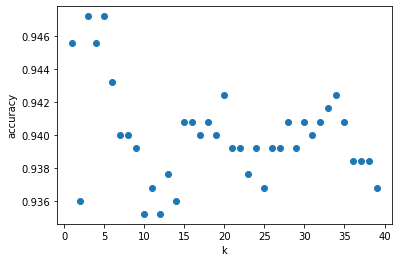

In [41]:
# Ahora implementaremos el modelo KNN importando solo las librerías que no hayamos importado antes
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier    
# Para determinar el número k de vecinos ideal para estos datos, probaré con 40 valores y graficaré su accuracy
k_range = range(1, 40)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_std, y_train)
    scores.append(knn.score(X_test_std, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40])

([<matplotlib.axis.XTick at 0x2a1caf0a250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

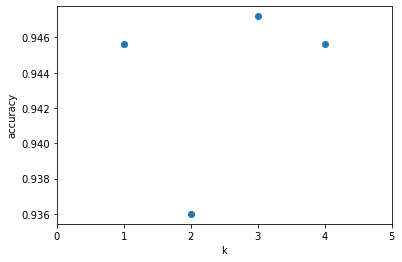

In [42]:
# Como se aprecia que para los valores menores o iguales a k=6, se genera el mayor accuracy, graficaré solo los 1eros 6 k
k_range = range(1, 5)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_std, y_train)
    scores.append(knn.score(X_test_std, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5])

In [43]:
# Como podemos notar, para k=3 se maximiza el accuracy, por ende con ese k se implementará el modelo
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
# Imprimo un reporte con las métricas de accuracy, precision, recall y f-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NonVar       0.43      0.35      0.39        17
        acep       0.00      0.00      0.00         2
         cep       0.76      0.73      0.75        30
         dpv       0.00      0.00      0.00         0
        dsct       1.00      0.62      0.77         8
         ecl       0.90      0.86      0.88       109
         lpv       0.98      0.99      0.98       952
       rrlyr       0.86      0.88      0.87       130
       t2cep       0.50      0.50      0.50         2

    accuracy                           0.95      1250
   macro avg       0.60      0.55      0.57      1250
weighted avg       0.95      0.95      0.95      1250



D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Archivos_de_instal

In [44]:
# Visualizo la matriz de confusion
confusion_matrix(y_test, y_pred)

array([[  6,   0,   0,   0,   0,   0,  11,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,  22,   1,   0,   1,   0,   6,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   5,   0,   0,   3,   0],
       [  0,   0,   0,   0,   0,  94,   7,   8,   0],
       [  7,   0,   0,   0,   0,   3, 941,   1,   0],
       [  1,   0,   6,   0,   0,   7,   0, 115,   1],
       [  0,   0,   0,   0,   0,   0,   1,   0,   1]], dtype=int64)

In [ ]:
# Para finalizar, comparo el rendimento de KNN contra el mejor modelo anterior (Random Forest), y sigue el Random Forest
# manteniendo mejores indicadores de rendimiento, obteniendo un 98% de accuracy v/s el 95% de KNN. Aunque ambos clasificadores 
# obtubieorn buenas evaluaciones, nos quedamos con Random Forest.